In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/ECE4076_Lab1_Student/

/content/drive/MyDrive/ECE4076_Lab1_Student


In [3]:
import os
import numpy as np
import cv2
import copy
from matplotlib import pyplot as plt

In [4]:
student_id =  # Add in your student ID
student_name = "" # Add in your student name

## I didn't use any AI or website codes.

# Task 1: Implement a function to perform convolution

In [5]:
## just use gaussian kernel 1 for this lab
gaussian_kernel_1 = 1 / 159 * np.array([[2, 4, 5, 4, 2], 
                            [4, 9 ,12 ,9, 4],
                            [5, 12, 15, 12, 5],
                            [4, 9, 12, 9, 4],
                            [2, 4, 5, 4, 2]])

gaussian_kernel_2 = 1 / 273 * np.array([[1, 4, 7, 4, 1],
                                       [4, 16, 26, 16, 4],
                                       [7, 26, 41, 26, 7],
                                       [4, 16, 26, 16, 4],
                                       [1, 4, 7, 4, 1]])

In [6]:
## convolution without padding
def conv(image, kernel):

    kernel_size = kernel.shape[0]
    reduced_size = kernel_size - 1

    row = image.shape[0]
    col = image.shape[1]

    ## Calculate the result image size
    result_image = np.zeros((image.shape[0] - reduced_size, image.shape[1] - reduced_size))

    ## loop from 0 row to the last one
    ## the last row must make kernel within the input image
    for i in range(row - reduced_size):

      ## loop from 0 column to the last one
      ## the last column also must make kernel within the input image
      for j in range(col - reduced_size):

        ## calculate convolution result
        result_image[i, j] = np.sum(image[i : kernel_size + i , j : kernel_size + j] * kernel)
    
    return result_image


## convolution with padding

## pad_with() will be used in np.pad()
def pad_with(vector, pad_width, iaxis, kwargs):
    pad_value = kwargs.get('padder', 10)
    vector[:pad_width[0]] = pad_value
    vector[-pad_width[1]:] = pad_value

def conv_withPadding(image, kernel):

    kernel_size = kernel.shape[0]
    padding_size = (kernel_size - 1) / 2

    row = image.shape[0]
    col = image.shape[1]

    ## the result image has the same size as input image
    result_image = np.zeros((row, col))

    ## increase the size from n * n to (n + 4) * (n + 4)
    image = np.pad(image, 2, pad_with, padder = padding_size)

    ## loop from 0 row to the last one
    ## the last row must make kernel within the input image
    for i in range(row):
      ## loop from 0 column to the last one
      ## the last column also must make kernel within the input image
      for j in range(col):
        
        ## calculate convolution result
        result_image[i, j] = np.sum(image[i : kernel_size + i , j : kernel_size + j] * kernel)
    
    return result_image

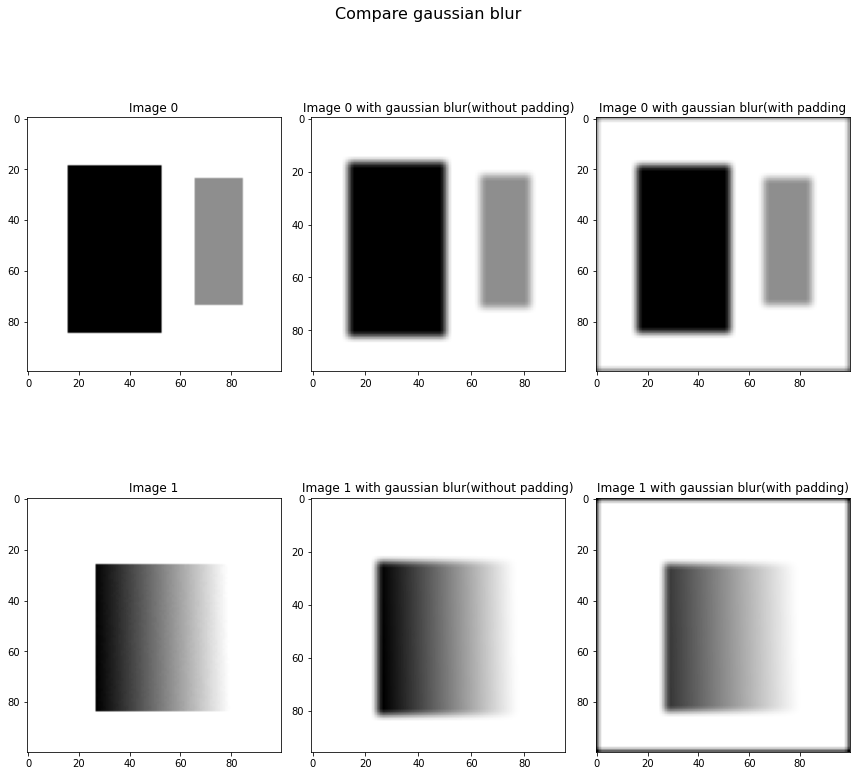

In [7]:
# Show results here

## load and convert the images
im_0 = cv2.cvtColor(cv2.imread('./test00.png'), cv2.COLOR_BGR2GRAY)
im_1 = cv2.cvtColor(cv2.imread('./test01.png'), cv2.COLOR_BGR2GRAY)
## gaussian blur
im_0_g = conv(im_0, gaussian_kernel_1)
im_1_g = conv(im_1, gaussian_kernel_1)
im_0_g_p = conv_withPadding(im_0, gaussian_kernel_1)
im_1_g_p = conv_withPadding(im_1, gaussian_kernel_1)

## plot 2 images
fig = plt.figure(figsize = (12, 12))
fig.suptitle("Compare gaussian blur", fontsize = 16)

plt.subplot(2, 3, 1)
plt.imshow(im_0, cmap = 'gray')
plt.title("Image 0")

plt.subplot(2, 3, 2)
plt.imshow(im_0_g, cmap = 'gray')
plt.title("Image 0 with gaussian blur(without padding)")

plt.subplot(2, 3, 3)
plt.imshow(im_0_g_p, cmap = 'gray')
plt.title("Image 0 with gaussian blur(with padding")

plt.subplot(2, 3, 4)
plt.imshow(im_1, cmap = 'gray')
plt.title("Image 1")

plt.subplot(2, 3, 5)
plt.imshow(im_1_g, cmap = 'gray')
plt.title("Image 1 with gaussian blur(without padding)")

plt.subplot(2, 3, 6)
plt.imshow(im_1_g_p, cmap = 'gray')
plt.title("Image 1 with gaussian blur(with padding)")

plt.tight_layout()
plt.show()

# Task 2: Calculate the image gradients


In [8]:
sobel_x_kernel = np.array([[-1, 0, 1],
                           [-2, 0, 2], 
                           [-1, 0, 1]])

## the positive direction of vertical gradient is up
sobel_y_kernel = np.array([[1, 2, 1], 
                           [0, 0, 0], 
                           [-1, -2, -1]])

In [9]:
## load and convert the images
im_2 = cv2.cvtColor(cv2.imread('./test02.png'), cv2.COLOR_BGR2GRAY)

## gaussian blur(without padding)
im_2_g = conv(im_2, gaussian_kernel_1)

## calculate the gradient of the image through sobel kernel
im_2_g_dx = conv(im_2_g, sobel_x_kernel)
im_2_g_dy = conv(im_2_g, sobel_y_kernel)

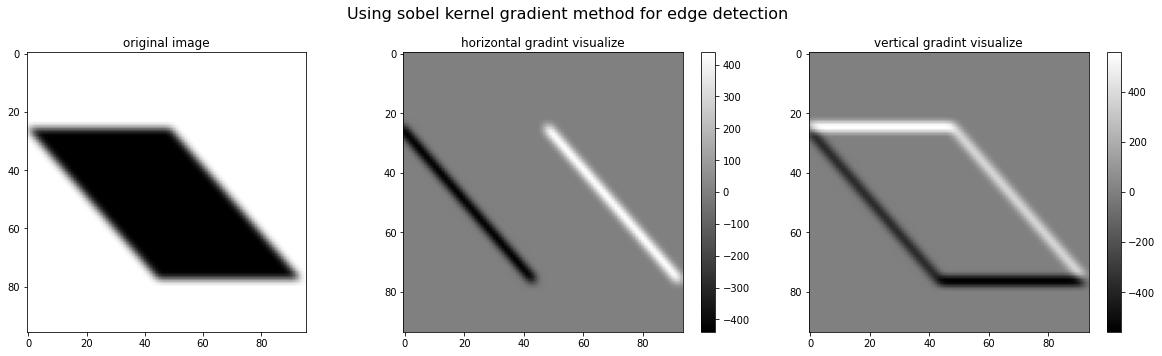

Conclusion: gradient is positive when color change from white(1) to black(0), vice versa.


In [10]:
## check result

fig = plt.figure(figsize = (17, 5))
fig.suptitle("Using sobel kernel gradient method for edge detection", fontsize = 16)

plt.subplot(1, 3, 1)
plt.imshow(im_2_g, cmap = 'gray')
plt.title("original image")

plt.subplot(1, 3, 2)
plt.imshow(im_2_g_dx, cmap = 'gray')
plt.title("horizontal gradint visualize")
plt.colorbar()

plt.subplot(1, 3, 3)
plt.imshow(im_2_g_dy, cmap = 'gray')
plt.title("vertical gradint visualize")
plt.colorbar()

plt.tight_layout()
plt.show()

print("Conclusion: gradient is positive when color change from white(1) to black(0), vice versa.")

In [11]:
# Demonstrate your understanding by answering the question below:
# Looking at the filter coefficients, explain how a sobel filter picks out horizontal edges?

## Answer: The sobel horizontal filter calculates x direction gradient by discrete differentiation, which
## is using right pixel value minus left pixel value. But if we choose left is positive direction, the first column
## should be positive and third column should be negative.

# Task 3: Calculate gradient magnitude

In [12]:
## load and convert the images
im_3 = cv2.cvtColor(cv2.imread('./test03.png'), cv2.COLOR_BGR2GRAY)

## gaussian blur(without padding)
im_3_g = conv(im_3, gaussian_kernel_1)

## calculate the gradient of the image through sobel kernel
im_3_g_dx = conv(im_3_g, sobel_x_kernel)
im_3_g_dy = conv(im_3_g, sobel_y_kernel)

In [13]:
## calculate gradient magnitude
im_3_g_gmagnitude = np.sqrt(im_3_g_dx ** 2 + im_3_g_dy ** 2)

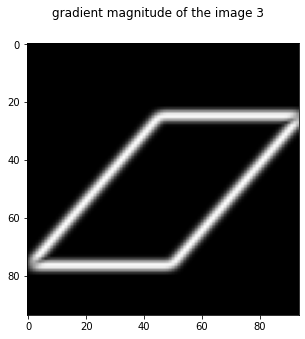

Conclusion: the magnitude of the gradient shows the edge of the object.


In [14]:
## visualize gradient magnitude
fig = plt.figure(figsize = (5, 5))
fig.suptitle("gradient magnitude of the image 3")
plt.imshow(im_3_g_gmagnitude, cmap = 'gray')
plt.show()

print("Conclusion: the magnitude of the gradient shows the edge of the object.")

In [15]:
# Demonstrate your understanding by answering the question below:
# What differences in gradient magnitude would be observed for a corner, edge and solid region?

## The edge is shown by gradient magnitude. And corner is where horizontal gradient and vertical gradient 
## combined together, which is consist of part edges. Solid region is inner part of the edge.

# Task 4: Calculate gradient orientation

In [16]:
## load and convert the images
im_4 = cv2.cvtColor(cv2.imread('./test04.jpg'), cv2.COLOR_BGR2GRAY)

## gaussian blur(without padding)
im_4_g = conv(im_4, gaussian_kernel_1)

## calculate the gradient of the image through sobel kernel
im_4_g_dx = conv(im_4_g, sobel_x_kernel)
im_4_g_dy = conv(im_4_g, sobel_y_kernel)

In [17]:
 def gradient_orientation(im_g_dx, im_g_dy): 
  
  ## replace all 0s in horizontal derivative matrix of the image to 1e-15 avoiding invalid dividing
  im_g_dx[im_g_dx == 0] = 1e-5

  ## image 3 after gaussian blur then calculate gradient orientation
  im_g_go = np.arctan(im_g_dy / im_g_dx)

  ## Only need to use 8 cardinal directions
  ## East: degree from -22.5 to 22.5
  cond_E = im_g_dx > 0
  E_1 = im_g_go >= -0.3926
  E_2 = im_g_go < 0.3926

  ## NorthEast: degree from 22.5 to 67.5
  cond_NE_1 = im_g_dx > 0
  cond_NE_2 = im_g_dy > 0
  NE_1 = im_g_go >= 0.3926
  NE_2 = im_g_go < 1.1781

  ## North: degree from 67.5 to 112.5
  cond_N = im_g_dy > 0
  N_1 = im_g_go >= 1.1781
  N_2 = im_g_go < -1.1781

  ## NorthWest: degree from 112.5 to 157.5
  cond_NW_1 = im_g_dx < 0
  cond_NW_2 = im_g_dy < 0
  NW_1 = im_g_go >= -1.1781
  NW_2 = im_g_go < -0.3926

  ## West: degree from 157.5 to 202.5
  cond_W = im_g_dx < 0
  W_1 = im_g_go >= -0.3926
  W_2 = im_g_go < 0.3926

  ## SouthWest: degree from 202.5 to 247.5
  cond_SW_1 = im_g_dx < 0
  cond_SW_2 = im_g_dy < 0
  SW_1 = im_g_go >= 0.3926
  SW_2 = im_g_go < 1.1781

  ## South: degree from 247.5 to 292.5
  cond_S = im_g_dy < 0
  S_1 = im_g_go >= 1.1781
  S_2 = im_g_go < -1.1781

  ## SouthEast: degree from 292.5 to 337.5
  cond_SE_1 = im_g_dx > 0
  cond_SE_2 = im_g_dy < 0
  SE_1 = im_g_go >= -1.1781
  SE_2 = im_g_go < -0.3926

  E = E_1 & E_2 & cond_E
  E = np.where(E, 0, im_g_go)

  NE = NE_1 & NE_2 & cond_NE_1 & cond_NE_2
  NE = np.where(NE, 0.7854, E)

  N = (N_1 | N_2) & cond_N
  N = np.where(N, 1.5708, NE)

  NW = NW_1 & NW_2 & cond_NW_1 & cond_NW_2
  NW = np.where(NW, 2.3562, N)

  W = (W_1 | W_2) & cond_W
  W = np.where(W, 3.1416, NW)

  SW = SW_1 & SW_2 & cond_SW_1 & cond_SW_2
  SW = np.where(SW, 3.9270, W)

  S = (S_1 | S_2) & cond_S
  S = np.where(S, 4.7124, SW)

  SE = SE_1 & SE_2 & cond_SE_1 & cond_SE_2
  SE = np.where(SE, 5.4978, S)

  result_image = SE

  return result_image

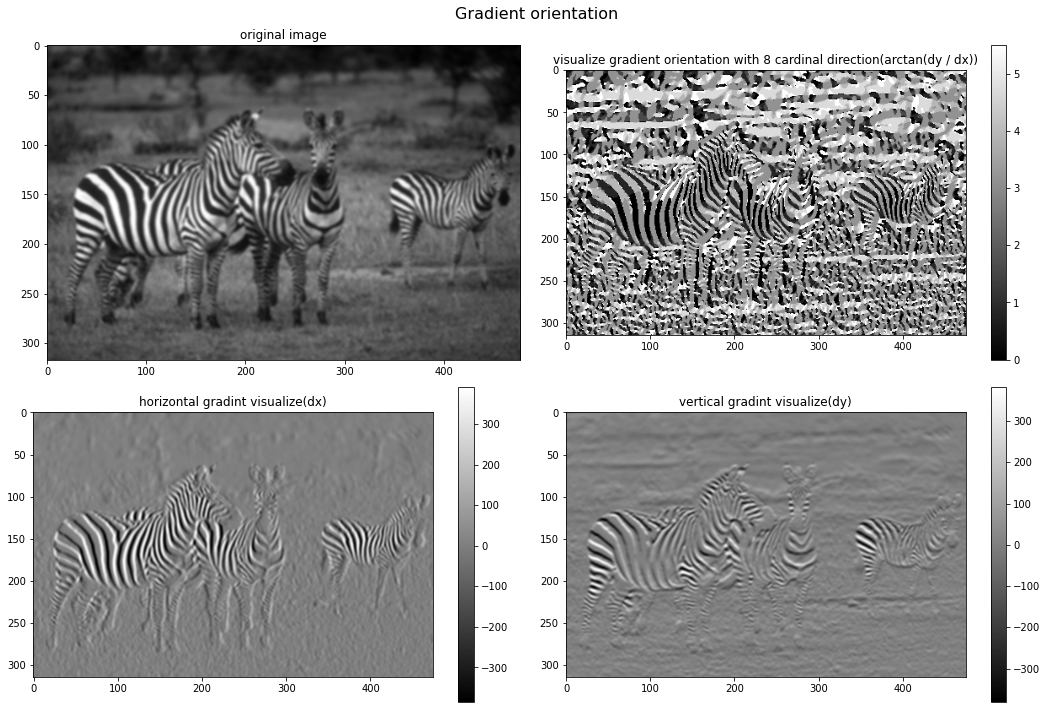

The positive direction for dx and dy is right and up respectively.


In [18]:
im_4_gradientOri = gradient_orientation(im_4_g_dx, im_4_g_dy)

fig = plt.figure(figsize = (15, 10))
fig.suptitle("Gradient orientation", fontsize = 16)

plt.subplot(2, 2, 1)
plt.imshow(im_4_g, cmap = 'gray')
plt.title("original image")

plt.subplot(2, 2, 2)
plt.imshow(im_4_gradientOri, cmap = 'gray')
plt.title("visualize gradient orientation with 8 cardinal direction(arctan(dy / dx))")
plt.colorbar()

plt.subplot(2, 2, 3)
plt.imshow(im_4_g_dx, cmap = 'gray')
plt.title("horizontal gradint visualize(dx)")
plt.colorbar()

plt.subplot(2, 2, 4)
plt.imshow(im_4_g_dy, cmap = 'gray')
plt.title("vertical gradint visualize(dy)")
plt.colorbar()

plt.tight_layout()
plt.show()

print("The positive direction for dx and dy is right and up respectively.")

In [19]:
# Demonstrate your understanding by answering the question below:
# How could the gradient orientation be used to obtain rotational invariance for patch matching?

## We can use gradient orientation to find dominant gradient direction, and align it with x axis.
## Thus whatever it rotates, the dominant gradient direction is always the same.

# Task 5: Extend your code to perform non-maximal suppression

In [20]:
def nonMaxima_suppression(image, gradient_ori):
  row, col = image.shape

  ## resize from nxn matrix to (n-2)x(n-2) matrix
  for i in range(row - 2):
    for j in range(col - 2):
      a = i + 1
      b = j + 1

      if gradient_ori[a, b] == 0 or gradient_ori[a, b] == 3.1416:
        check_1 = image[a, b + 1]
        check_2 = image[a, b - 1]

      elif gradient_ori[a, b] == 0.7854 or gradient_ori[a, b] == 3.9270:
        check_1 = image[a - 1, b + 1]
        check_2 = image[a + 1, b - 1]

      elif gradient_ori[a, b] == 1.5708 or gradient_ori[a, b] == 4.7124:
        check_1 = image[a - 1, b]
        check_2 = image[a + 1, b]

      elif gradient_ori[a, b] == 2.3562 or gradient_ori[a, b] == 5.4978:
        check_1 = image[a - 1, b - 1]
        check_2 = image[a + 1, b + 1]

      if image[a, b] <= check_1 or image[a, b] <= check_2:
        image[a, b] = 0

  return image

In [21]:
## load and convert the images
im_5 = cv2.cvtColor(cv2.imread('./test05.jpg'), cv2.COLOR_BGR2GRAY)

## gaussian blur(without padding)
im_5_g = conv(im_5, gaussian_kernel_1)

## calculate the gradient of the image through sobel kernel
im_5_g_dx = conv(im_5_g, sobel_x_kernel)
im_5_g_dy = conv(im_5_g, sobel_y_kernel)

## calculate gradient magnitude
im_5_g_gmagnitude = np.sqrt(im_5_g_dx ** 2 + im_5_g_dy ** 2)

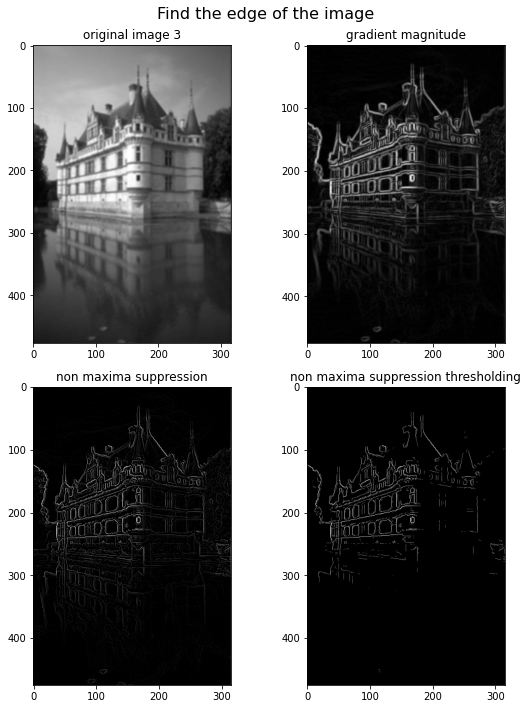

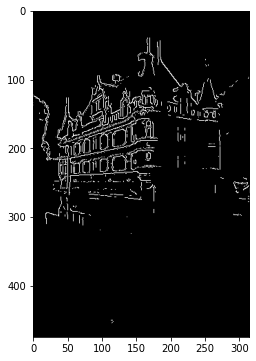

In [22]:
## calculate gradient orientation of image 5
im_5_gradientOri = gradient_orientation(im_5_g_dx, im_5_g_dy)

## deep copy the image
im_5_nonMaxima = copy.deepcopy(im_5_g_gmagnitude)
im_5_nonMaxima = nonMaxima_suppression(im_5_nonMaxima, im_5_gradientOri)
im_5_threshold = np.where(im_5_nonMaxima > im_5_nonMaxima.max() * 0.25, im_5_nonMaxima, 0)


fig = plt.figure(figsize = (8, 10))
fig.suptitle("Find the edge of the image", fontsize = 16)

plt.subplot(2, 2, 1)
plt.imshow(im_5_g, cmap = 'gray')
plt.title("original image 3")

plt.subplot(2, 2, 2)
plt.imshow(im_5_g_gmagnitude, cmap = 'gray')
plt.title("gradient magnitude")

plt.subplot(2, 2, 3)
plt.imshow(im_5_nonMaxima, cmap = 'gray')
plt.title("non maxima suppression")

plt.subplot(2, 2, 4)
plt.imshow(im_5_threshold, cmap = 'gray')
plt.title("non maxima suppression thresholding")

plt.tight_layout()
plt.show()


## applying threshold after non maxima suppression
plt.figure(figsize = (6, 6))
fig.suptitle("Binary image of non maxima suppression", fontsize = 16)

im_5_threshold[im_5_threshold > 0] = 1
im_5_binary = im_5_threshold
plt.imshow(im_5_binary, cmap = 'gray')
plt.show()

In [23]:
# Demonstrate your understanding by answering the question below:
# Explain how you chose the threshold for non-maximal suppression?

## Answer: Threshold value should greater than most noise thus filter noise and keep the edge only.

# Task 6: Find the helipad

In [24]:
## define median filter
def median_filter(image, kernel_size):
    reduced_size = kernel_size - 1

    row = image.shape[0]
    col = image.shape[1]

    ## Calculate the result image size
    result_image = np.zeros((image.shape[0] - reduced_size, image.shape[1] - reduced_size))

    ## loop from 0 row to the last one
    ## the last row must make kernel within the input image
    for i in range(row - reduced_size):

      ## loop from 0 column to the last one
      ## the last column also must make kernel within the input image
      for j in range(col - reduced_size):

        ## choose the median value
        result_image[i, j] = np.median(image[i : kernel_size + i , j : kernel_size + j])
    
    return result_image

In [25]:
## using blob statistics to find the center of the object
def blob_statistics(image):
  row, col = image.shape
  m_00 = np.sum(image)
  m_10 = 0
  m_01 = 0

  for i in range(row):
    for j in range(col):
      m_10 = m_10 + i * image[i, j]
      m_01 = m_01 + j * image[i, j]

  i = m_10 / m_00
  j = m_01 / m_00

  return i, j

In [26]:
# i, j = blob_statistics(im_binary)
# x = j
# y = im_binary.shape[0] - i


In [27]:
def findTheCenter(im):  
  ## gaussian blur(without padding)
  im_g = conv(im, gaussian_kernel_1)

  ## calculate the gradient of the image through sobel kernel
  im_g_dx = conv(im_g, sobel_x_kernel)
  im_g_dy = conv(im_g, sobel_y_kernel)

  ## calculate gradient magnitude
  im_g_gmagnitude = np.sqrt(im_g_dx ** 2 + im_g_dy ** 2)

  ## calculate gradient orientation of helipad image
  im_gradientOri = gradient_orientation(im_g_dx, im_g_dy)

  ## perform non-maxima suppression method
  im_nonMaxima = copy.deepcopy(im_g_gmagnitude)
  im_nonMaxima = nonMaxima_suppression(im_nonMaxima, im_gradientOri)
  im_threshold = np.where(im_nonMaxima > im_nonMaxima.max() * 0.55, im_nonMaxima, 0)

  ## set non-maxima suppression cut-off region
  im_threshold[im_threshold > 0] = 1
  im_binary = im_threshold

  print("Original image size: ", im.shape)
  print("After gaussian blur: ", im_g.shape)
  print("After derivation: ", im_g_gmagnitude.shape)
  print("After gradient orientation: ", im_gradientOri.shape)
  print("After non-maxima suppression: ", im_nonMaxima.shape)

  ## using blob statistics method to find the center of the image
  i, j = blob_statistics(im_binary)
  x = j
  y = im_binary.shape[0] - i

  ## using average value(this doesn't work well)
  # x = 0
  # y = 0
  # for n in range(4):
    # v = n + 4
    # t = np.where(im_nonMaxima > im_nonMaxima.max() * 0.1 * v, im_nonMaxima, 0)
    # t = median_filter(t, 3)
    # t[t > 0] = 1
    # b = t
    # i, j = blob_statistics(b)
    # x = x + j
    # y = y + im_binary.shape[0] - i
  # x = x / 5
  # y = y / 5

  ## show the center of the image
  fig = plt.figure(figsize = (8, 8))
  fig.suptitle("The center of the image(black x)", fontsize = 16)
  plt.imshow(im, cmap = 'gray')
  plt.plot(x + 3, y + 3, 'kx', markersize = 18)
  print("The original helipad image's up part is shorter than down part, so center is moved up a")

  ## show the process of finding the center of the image
  fig = plt.figure(figsize = (12, 10))
  fig.suptitle("The process of finding the center of the image", fontsize = 16)

  plt.subplot(2, 3, 1)
  plt.imshow(im, cmap = 'gray')
  plt.title("original helipad image")

  plt.subplot(2, 3, 2)
  plt.imshow(im_g, cmap = 'gray')
  plt.title("image after gaussian blur")

  plt.subplot(2, 3, 3)
  plt.imshow(im_g_gmagnitude, cmap = 'gray')
  plt.title("image after derivation")

  plt.subplot(2, 3, 4)
  plt.imshow(im_gradientOri, cmap = 'gray')
  plt.title("image after gradient orientation")

  plt.subplot(2, 3, 5)
  plt.imshow(im_nonMaxima, cmap = 'gray')
  plt.title("image after non-maxima suppression")

  plt.subplot(2, 3, 6)
  plt.imshow(im_threshold, cmap = 'gray')
  plt.plot(x, y, 'rx', markersize = 12)
  plt.title("image after thresholding")

  plt.tight_layout()
  plt.show()

Original image size:  (101, 101)
After gaussian blur:  (97, 97)
After derivation:  (95, 95)
After gradient orientation:  (95, 95)
After non-maxima suppression:  (95, 95)
The original helipad image's up part is shorter than down part, so center is moved up a


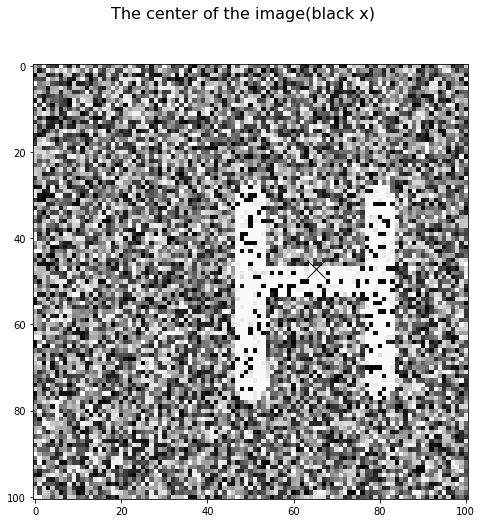

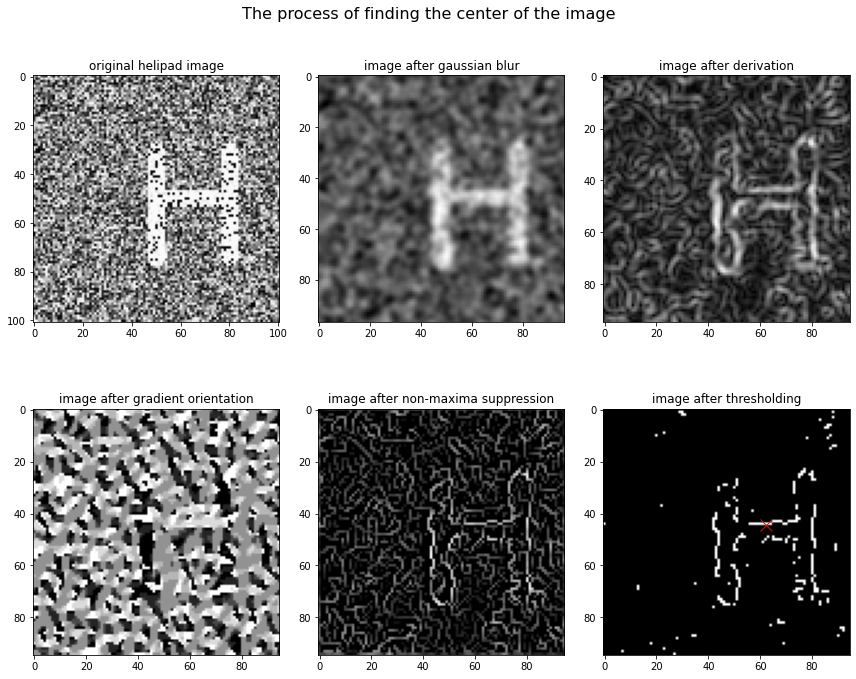

In [28]:
## load and convert the images
im_helipad = cv2.cvtColor(cv2.imread('./task6_helipad.png'), cv2.COLOR_BGR2GRAY)
findTheCenter(im_helipad)

In [29]:
# Demonstrate your understanding by answering the question below:
# How did you adapt your previous code to solve this problem?  

## Change the threshold after non-maxima suppression, I tried to use average value of the center, median filter and gaussian difference but it all 
## didn't end up well.

# Do not remove or edit the following code snippet. 

When submitting your lab, please ensure that you have run the entire notebook from top to bottom. You can do this by clicking "Kernel" and "Restart Kernel and Run All Cells". Make sure the last cell (below) has also been run. 

In [32]:
file_name = str(student_id) + '_Lab1_Submission.py'
cmd = "jupyter nbconvert --to script Lab1_student_template.ipynb --output " + file_name
if(os.system(cmd)):
    print("Error converting to .py")
    print("cmd")